In [1]:
%load_ext autoreload
%autoreload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns
from sklearn import mixture
import os
from clustering_and_prim_tools import *

In [3]:
%matplotlib inline

In [4]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [5]:
invfolder = "transport_cired_output_data/outputs_investments_module_billionusd/"
imaclimfolder = "transport_cired_output_data/outputs_Imaclim/"

In [6]:
os.listdir(imaclimfolder)

['results_transports_Imaclim_ASIA.csv',
 'results_transports_Imaclim_CIS.csv',
 'results_transports_Imaclim_LAM.csv',
 'results_transports_Imaclim_MAF.csv',
 'results_transports_Imaclim_OCDE.csv',
 'results_transports_Imaclim_WORLD.csv']

In [7]:
test = pd.read_csv(imaclimfolder+"results_transports_Imaclim_ASIA.csv",sep=";")

In [8]:
pd.options.display.max_seq_items = 2000

In [9]:
test.columns

Index(['//combi', 'ind_climat', 'ind_growth', 'ind_mitig', 'ind_trans_A',
       'ind_trans_S', 'ind_trans_I', 'ind_trans_F', 'ind_taxexo', 'ind_recycl',
       'ind_taxmax', 'Variable', 'Unit', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031',
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058',
       '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067',
       '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076',
       '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085',
       '2086', '2087', '2088', '2089', '2090', '2091', '2092',

In [10]:
all_ima_data = pd.DataFrame()
for myfilename in os.listdir(imaclimfolder):
    if "WORLD" in myfilename:
        continue
    myfile = pd.read_csv(imaclimfolder+"\\"+myfilename,sep=";")
    myinfo = myfilename.replace(".csv",'').split("_")
    myfile["region"] = myinfo[3]
    all_ima_data = all_ima_data.append(myfile)

In [11]:
all_ima_data.Variable.unique()

array(['Population', 'CO2_em_tot', 'CO2_em_trans', 'PIB',
       'passenger_activity', 'freight_activity', 'pkm_OT', 'pkm_auto',
       'pkm_air', 'fret_air', 'fret_OT', 'fret_mer'], dtype=object)

In [12]:
indexes_ima = ['//combi', 'ind_climat', 'ind_growth', 'ind_mitig', 'ind_trans_A',
       'ind_trans_S', 'ind_trans_I', 'ind_trans_F', 'ind_taxexo', 'ind_recycl',
       'ind_taxmax', 'Variable', 'Unit','region']

In [13]:
indexes_ima2 = ['ind_climat', 'ind_growth', 'ind_mitig', 'ind_trans_A',
       'ind_trans_S', 'ind_trans_I', 'ind_trans_F', 'ind_taxexo', 'ind_recycl',
       'ind_taxmax', 'Variable','region','year']

In [14]:
all_ima_data = all_ima_data.set_index(indexes_ima)
all_ima_data.columns.name='year'
all_ima_data = all_ima_data.drop(['2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058',
       '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067',
       '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076',
       '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085',
       '2086', '2087', '2088', '2089', '2090', '2091', '2092', '2093', '2094',
       '2095', '2096', '2097', '2098', '2099'],axis=1)
all_ima_data = all_ima_data.stack('year')
all_ima_data.name = 'value'

In [15]:
out = all_ima_data.reset_index().drop(['Unit','//combi'],axis=1).set_index(indexes_ima2).unstack('Variable').value

In [16]:
out.columns

Index(['CO2_em_tot', 'CO2_em_trans', 'PIB', 'Population', 'freight_activity',
       'fret_OT', 'fret_air', 'fret_mer', 'passenger_activity', 'pkm_OT',
       'pkm_air', 'pkm_auto'],
      dtype='object', name='Variable')

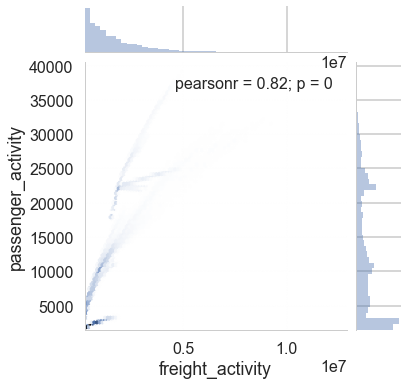

In [17]:
sns.jointplot(x="freight_activity", y="passenger_activity", data=out, kind="hex");

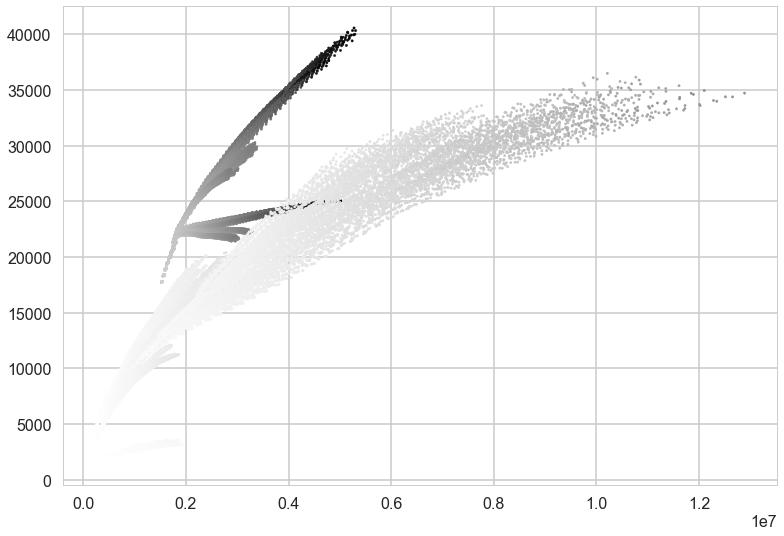

In [18]:
plt.scatter(out.freight_activity,out.passenger_activity,c=out.PIB,s=5)

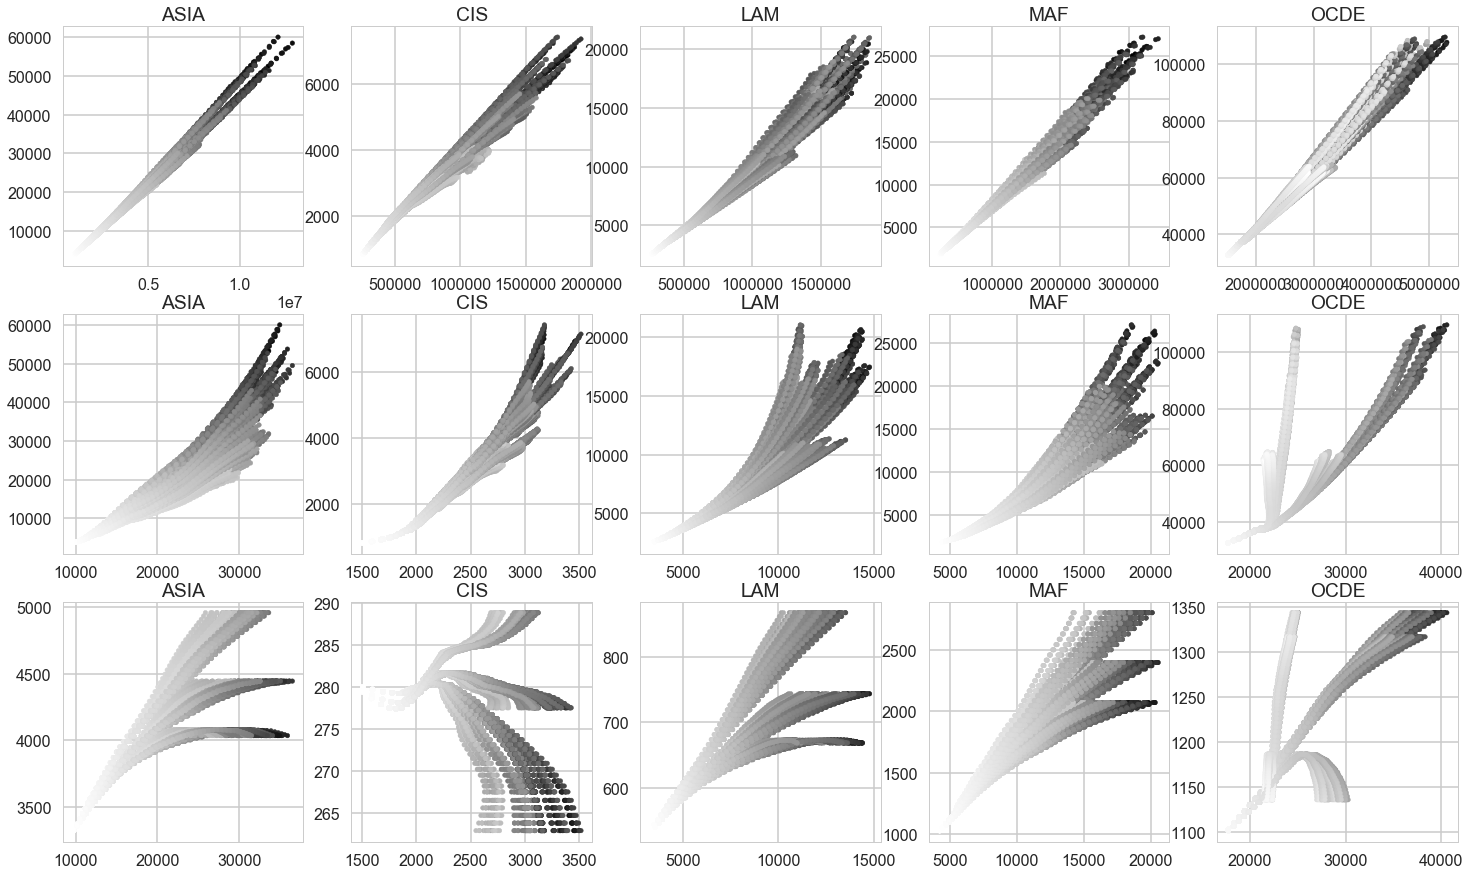

In [19]:
i=1
plt.figure(figsize=(25,15))
for reg,subframe in out.groupby(level='region'):
    plt.subplot(3,5,i)
    plt.scatter(subframe.freight_activity,subframe.PIB,c=subframe.CO2_em_trans,s=20)
    plt.title(reg)
    i=i+1
    
for reg,subframe in out.groupby(level='region'):
    plt.subplot(3,5,i)
    plt.scatter(subframe.passenger_activity,subframe.PIB,c=subframe.CO2_em_trans,s=20)
    plt.title(reg)
    i=i+1
    
for reg,subframe in out.groupby(level='region'):
    plt.subplot(3,5,i)
    plt.scatter(subframe.passenger_activity,subframe.Population,c=subframe.CO2_em_trans,s=20)
    plt.title(reg)
    i=i+1

In [20]:
ocde = out.stack().unstack("region")['OCDE'].unstack('year')['2049'].unstack("Variable").reset_index()

In [21]:
ocde

Variable,ind_climat,ind_growth,ind_mitig,ind_trans_A,ind_trans_S,ind_trans_I,ind_trans_F,ind_taxexo,ind_recycl,ind_taxmax,...,PIB,Population,freight_activity,fret_OT,fret_air,fret_mer,passenger_activity,pkm_OT,pkm_air,pkm_auto
0,0,1,1,1,1,1,1,0,0,0,...,106878.0,1343.98,5268000.0,3162400.0,1453600.0,652080.0,39946.0,3329.5,8247.2,28314.2
1,0,1,1,1,1,1,2,0,0,0,...,105881.0,1343.98,5238800.0,3168800.0,1423500.0,647000.0,39405.0,3358.2,7706.6,28291.3
2,0,1,1,1,1,2,1,0,0,0,...,107791.0,1343.98,5305000.0,3142900.0,1499700.0,662220.0,40330.0,3372.0,8619.4,28289.1
3,0,1,1,1,1,2,2,0,0,0,...,107160.0,1343.98,5292900.0,3147700.0,1484900.0,660260.0,40006.0,3400.7,8288.0,28266.4
4,0,1,1,1,2,1,1,0,0,0,...,105558.0,1343.98,5002200.0,3280800.0,1065480.0,655600.0,24999.6,6019.4,3181.7,15646.2
5,0,1,1,1,2,1,2,0,0,0,...,105231.0,1343.98,5008300.0,3284000.0,1067680.0,655730.0,25009.4,6016.2,3184.1,15646.2
6,0,1,1,1,2,2,1,0,0,0,...,106256.0,1343.98,5011100.0,3262500.0,1084660.0,664540.0,25057.0,6075.1,3208.7,15623.0
7,0,1,1,1,2,2,2,0,0,0,...,106038.0,1343.98,5019400.0,3265200.0,1088060.0,666660.0,25056.9,6075.0,3208.3,15623.0
8,0,1,1,2,1,1,1,0,0,0,...,106400.0,1343.98,4746800.0,2896000.0,1223200.0,627280.0,37443.0,3172.6,5600.5,28604.8
9,0,1,1,2,1,1,2,0,0,0,...,105729.0,1343.98,4735600.0,2901900.0,1209100.0,624660.0,37157.0,3195.5,5316.2,28571.1


In [22]:
oois = ['passenger_activity','PIB']

data = np.array([[ocde[oois[0]][0],ocde[oois[1]][0]]])
for i in range(1,len(ocde.index)):
    data = np.concatenate((data,np.array([[ocde[oois[0]][i],ocde[oois[1]][i]]])))

data_norm = normalize(data)

In [23]:
inputs = ocde[['ind_climat', 'ind_growth', 'ind_mitig', 'ind_trans_A',
       'ind_trans_S', 'ind_trans_I', 'ind_trans_F', 'ind_taxexo', 'ind_recycl',
       'ind_taxmax']]

In [24]:
n_clusters = 6
f_value = 0.5
seuil = 1.2

In [26]:
while n_clusters>2:

    condition = True

    for i in get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs,data_norm)[0]:
        if i.coverage+i.density < seuil:
            condition = False
        else:
            condition = condition&True
    if condition == True:
        break
    else:
        n_clusters = n_clusters - 1
        continue


#Plot of clusters


dummy = get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs,data_norm)
boxes = dummy[0]
df = dummy[1]

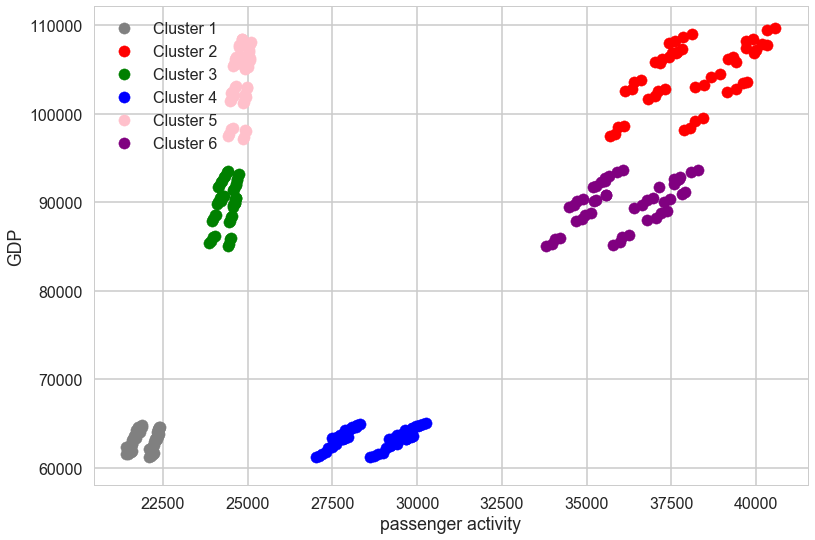

In [30]:
mycolors = ["grey","red","green","blue","pink","purple"]
for (i,subdf) in df.groupby("class"):

    plt.scatter(subdf.passenger_activity,subdf.PIB,label="Cluster {}".format(i),c=mycolors[i-1])
plt.legend()
plt.xlabel("passenger activity")
plt.ylabel("GDP")

In [33]:
boxes[0].limits

,min,max,qp values
ind_growth,3.0,3.0,1.253660e-23
ind_trans_S,2.0,2.0,3.552714e-15


In [34]:
boxes[1].limits

,min,max,qp values
ind_growth,1.0,1.0,1.253660e-23
ind_trans_S,1.0,1.0,3.552714e-15


In [35]:
boxes[2].limits

,min,max,qp values
ind_growth,2.0,2.0,1.253660e-23
ind_trans_S,2.0,2.0,3.552714e-15


In [36]:
boxes[3].limits

,min,max,qp values
ind_growth,3.0,3.0,1.253660e-23
ind_trans_S,1.0,1.0,3.552714e-15


In [37]:
boxes[4].limits

,min,max,qp values
ind_growth,1.0,1.0,1.253660e-23
ind_trans_S,2.0,2.0,3.552714e-15


In [38]:
boxes[5].limits

,min,max,qp values
ind_growth,2.0,2.0,1.253660e-23
ind_trans_S,1.0,1.0,3.552714e-15


The results from the analysis above suggests that oecd can keep growing without increasing passenger transport activity (and therefore not increasing emissions) in the scenario with a structural change on the number of people per car and on road capacity for cars.

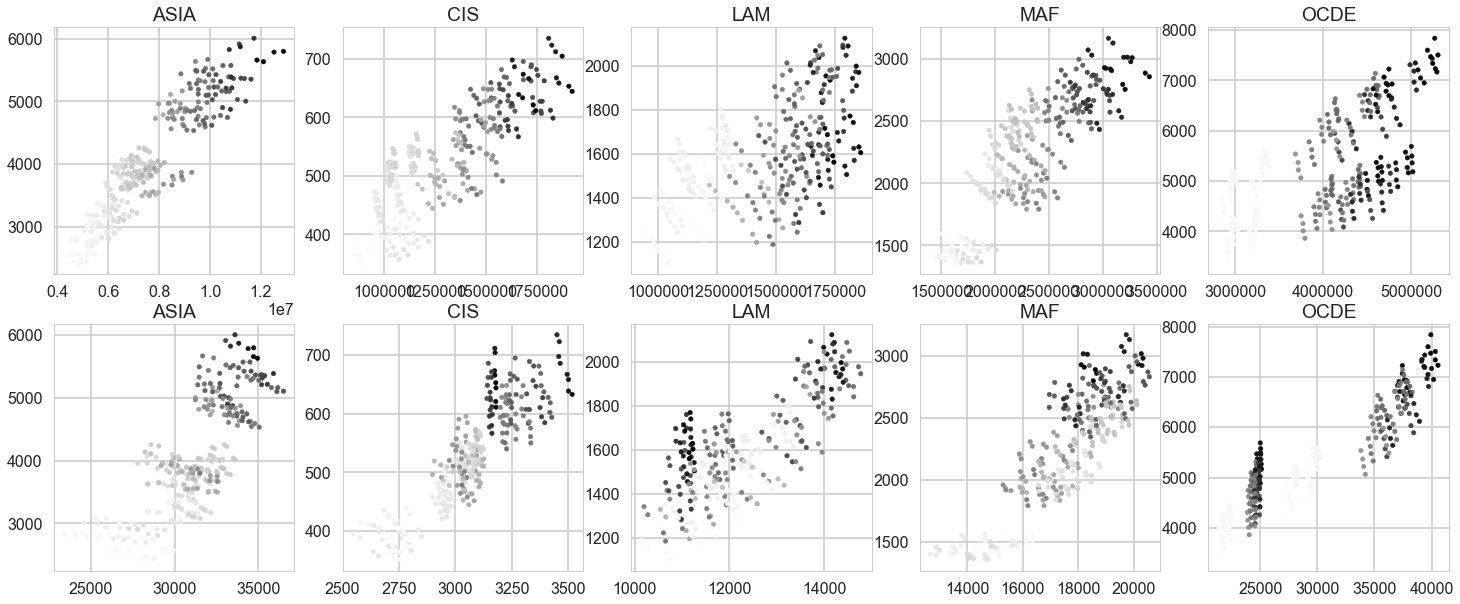

In [43]:
test = out.stack().unstack('year')['2049'].unstack('Variable')
i=1
plt.figure(figsize=(25,10))
for reg,subframe in test.groupby(level='region'):
    plt.subplot(2,5,i)
    plt.scatter(subframe.freight_activity,subframe.CO2_em_trans,c=subframe.PIB,s=20)
    plt.title(reg)
    i=i+1
    
for reg,subframe in test.groupby(level='region'):
    plt.subplot(2,5,i)
    plt.scatter(subframe.passenger_activity,subframe.CO2_em_trans,c=subframe.PIB,s=20)
    plt.title(reg)
    i=i+1

sum over time

In [71]:
out_summed_over_time = out.sum(level=[x for x in indexes_ima2 if (x not in ['year','Variable'])])

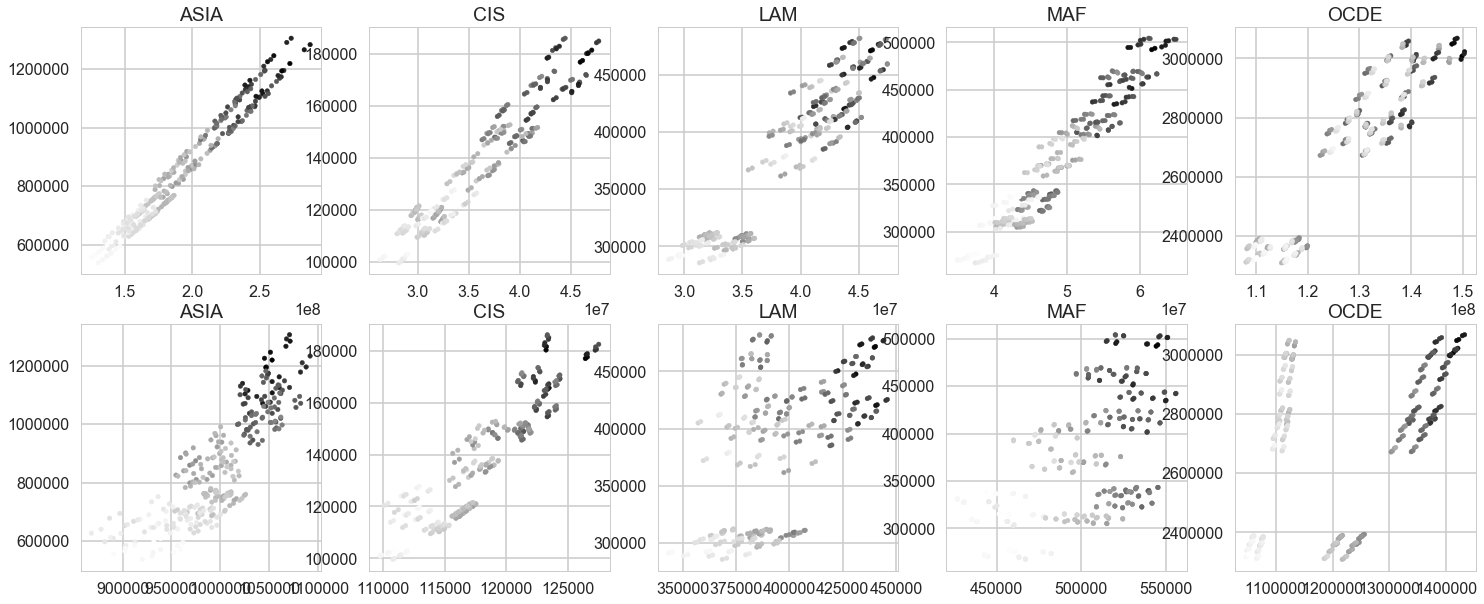

In [78]:
i=1
plt.figure(figsize=(25,10))
for reg,subframe in out_summed_over_time.groupby(level='region'):
    plt.subplot(2,5,i)
    plt.scatter(subframe.freight_activity,subframe.PIB,c=subframe.CO2_em_trans,s=20)
    plt.title(reg)
    i=i+1
for reg,subframe in out_summed_over_time.groupby(level='region'):    
    plt.subplot(2,5,i)
    plt.scatter(subframe.passenger_activity,subframe.PIB,c=subframe.CO2_em_trans,s=20)
    plt.title(reg)
    i=i+1




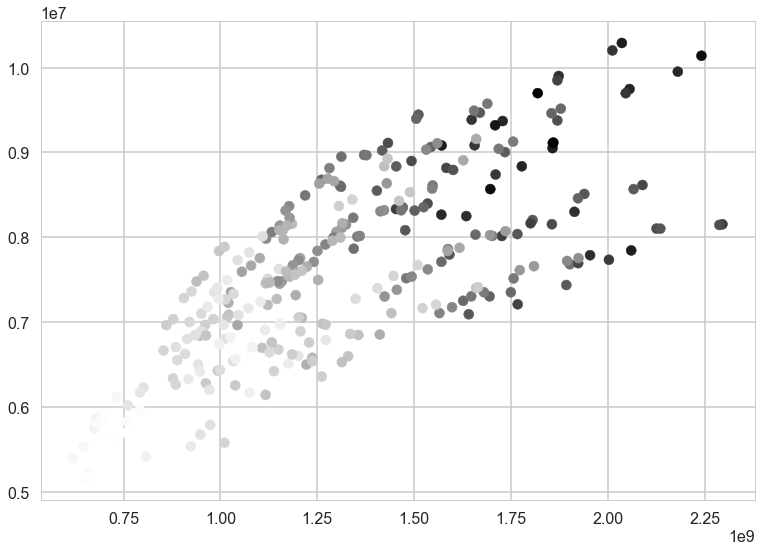

In [44]:
plt.scatter(out_summed_over_time.freight_activity,out_summed_over_time.passenger_activity,c=out_summed_over_time.CO2_em_trans,s=100)

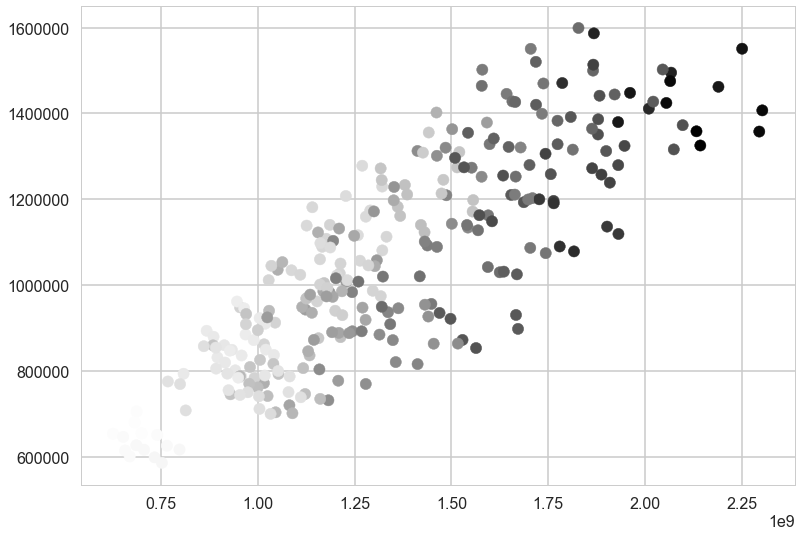

In [47]:
plt.scatter(out_summed_over_time.freight_activity+out_summed_over_time.passenger_activity,out_summed_over_time.CO2_em_trans,c=out_summed_over_time.PIB)

remember to discount later the data in invfolder

In [35]:
all_data = pd.DataFrame()
for reg in os.listdir(invfolder):
    for myfilename in os.listdir(invfolder+reg):
        myfile = pd.read_csv(invfolder+reg+"\\"+myfilename,sep=";")
        myfile = myfile.set_index(indexes).sum(axis=1).reset_index().rename(columns={0:"total_cost"})
        myinfo = myfilename.replace(".csv",'').split("_")
        myfile["costtype"] = myinfo[1]
        myfile["transpmode"] = myinfo[2]
        myfile["region"] = myinfo[3]
        all_data = all_data.append(myfile)

In [37]:
indexes2 = ["costtype","transpmode","region"]

In [39]:
all_data = all_data.set_index(indexes+indexes2)

In [48]:
try1 = all_data.sum(level=indexes+["costtype"]).unstack("costtype")["total_cost"].reset_index()

In [77]:
try1.describe()

costtype,combi,ind_climat,ind_growth,ind_mitig,ind_trans_A,ind_trans_S,ind_trans_I,ind_trans_F,modal_scenario,costs_evolution_road,costs_evolution_rail,ur_ideal,urt_ideal,delay,maint,new
count,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000,62208.000000
mean,176.500000,2.000000,2.000000,1.500000,1.500000,1.500000,1.500000,1.500000,0.500000,1.000000,1.000000,600.000000,17500.000000,50.000000,92169.881534,58554.999784
std,122.898981,1.633006,0.816503,0.500004,0.500004,0.500004,0.500004,0.500004,0.500004,0.816503,0.816503,244.950943,12500.100471,15.000121,29250.315617,42162.016915
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,300.000000,5000.000000,35.000000,50123.080770,6307.147997
25%,72.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,300.000000,5000.000000,35.000000,71614.850097,27061.475699
50%,144.500000,2.000000,2.000000,1.500000,1.500000,1.500000,1.500000,1.500000,0.500000,1.000000,1.000000,600.000000,17500.000000,50.000000,87198.779651,44616.002838
75%,312.250000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,900.000000,30000.000000,65.000000,104106.630671,79530.010817
max,384.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,900.000000,30000.000000,65.000000,228156.429701,237140.349021


In [50]:
oois = ['maint','new']

data = np.array([[try1[oois[0]][0],try1[oois[1]][0]]])
for i in range(1,len(try1.index)):
    data = np.concatenate((data,np.array([[try1[oois[0]][i],try1[oois[1]][i]]])))

data_norm = normalize(data)

In [66]:
inputs = try1[indexes[1:]]

In [74]:
n_clusters = 6
f_value = 0.5
seuil = 1.2

In [75]:
while n_clusters>2:

    condition = True

    for i in get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs)[0]:
        if i.coverage+i.density < seuil:
            condition = False
        else:
            condition = condition&True
    if condition == True:
        break
    else:
        n_clusters = n_clusters - 1
        continue


#Plot of clusters


dummy = get_prim(n_clusters, f_value, data,oois[0],oois[1],inputs)
boxes = dummy[0]
df = dummy[1]

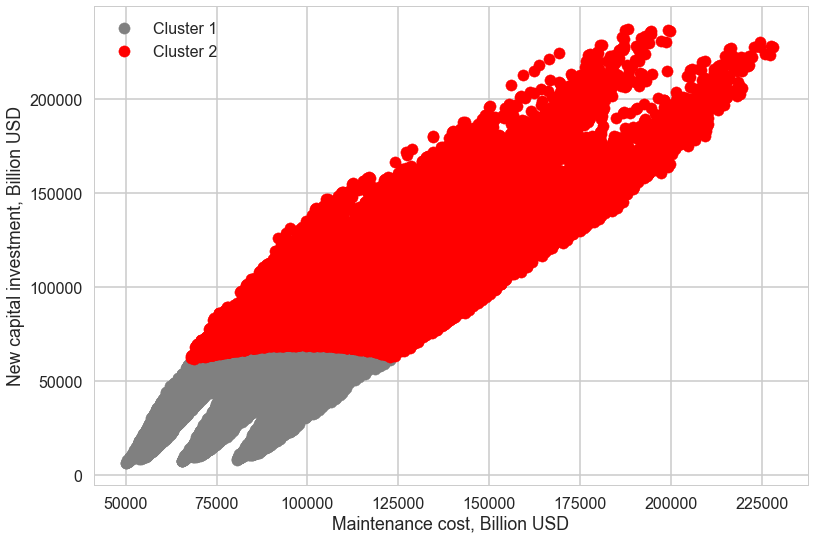

In [76]:
mycolors = ["grey","red","green","blue"]
for (i,subdf) in df.groupby("class"):

    plt.scatter(subdf.maint,subdf.new,label="Cluster {}".format(i),c=mycolors[i-1])
plt.legend()
plt.xlabel("Maintenance cost, Billion USD")
plt.ylabel("New capital investment, Billion USD")

In [72]:
boxes[0].limits

,min,max,qp values
ur_ideal,600.0,900.0,0.0


In [73]:
boxes[1].limits

,min,max,qp values
ur_ideal,300.0,300.0,0.0
